# Pytorch for computer vision

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import torch
import torch.nn as nn
import torch.functional as fn
import torchvision

In [5]:
from torchvision.transforms import transforms

In [6]:
train_data=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

Files already downloaded and verified


In [7]:
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [36]:
trainloader=torch.utils.data.DataLoader(train_data,batch_size=10,shuffle=True)

In [37]:
dataiter=iter(trainloader)
images,label=dataiter.next()

In [38]:
images.shape

torch.Size([10, 3, 32, 32])

In [39]:
images[0].shape

torch.Size([3, 32, 32])

In [40]:
label[0].item()

3

In [41]:
img=images[0]
print(type(img))
np_img=img.numpy()
print(type(np_img))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [42]:
np_img=np.transpose(np_img,(1,2,0))
print(np_img.shape)

(32, 32, 3)


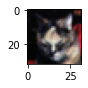

In [43]:
plt.figure(figsize=(1,1))
plt.imshow(np_img)
plt.show()

In [44]:
def imshow(img):
    np_img=img.numpy()
    plt.figure(figsize=(2,2))
    plt.imshow(np.transpose(np_img,(1,2,0)))
    plt.show()

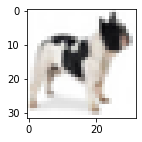

In [45]:
imshow(images[6])

In [46]:
classes[label[6].item()]

'dog'

## Single Convolutional layer

In [63]:
class ConvLayer(nn.Module):
    def __init__(self):
        super(ConvLayer,self).__init__()
        self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2))  
        #3: num_channels in each image,16 : num of output channels,3:kernel_size padding=(1,1),stride=2
        #padding ensures that the output remain same in size as 32x32 in our case
        #stride : move kth step at a time in both x and y direction can produces output in (original/k)size
    def forward(self,x):
        x=self.conv1(x)
        return x
        

In [64]:
net=ConvLayer()

In [65]:
out=net(images)

In [66]:
out.shape

torch.Size([10, 16, 16, 16])

In [67]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [68]:
#0th batch, 0th channel, all 30x30 img conv file
out1=out[0,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


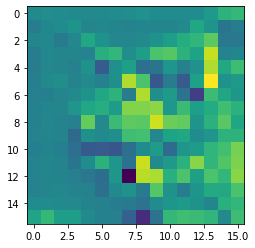

In [69]:
plt.imshow(out1)

### ConvV2

In [70]:
class ConvLayerV2(nn.Module):
    def __init__(self):
        super(ConvLayerV2,self).__init__()
        self.model=nn.Sequential(nn.Conv2d(3,8,3) #(N,3,32,32) -> (N,8,30,30)
                                 ,nn.Conv2d(8,16,3)) #(N,8,30,30)->(N,16,28,28)
        
    def forward(self,x):
        x=self.model(x)
        return x
        

In [72]:
netV2=ConvLayerV2()

In [73]:
out=netV2(images)

In [74]:
out.shape

torch.Size([10, 16, 28, 28])

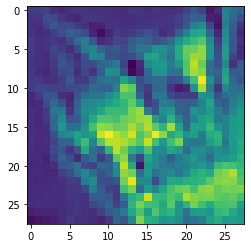

In [76]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

### ConvV3

In [82]:
class ConvLayerV3(nn.Module):
    def __init__(self):
        super(ConvLayerV3,self).__init__()
        
        self.model=nn.Sequential(nn.Conv2d(3,6,5), #(N,3,32,32) -> (N,6,28,28) (32-5)/S+1 -> 28
                            nn.AvgPool2d(2,stride=2), #kernel size=2 (N,6,28,28) -> (N,6,14,14)
                            nn.Conv2d(6,16,5), #(N,6,14,14)->(N,16,10,10)
                            nn.AvgPool2d(2,stride=2) #(N,16,10,10) -> (N,16,5,5)
        )
    def forward(self,x):
        x=self.model(x)
        return x

In [83]:
net=ConvLayerV3()

In [84]:
out=net(images)

In [85]:
out.shape

torch.Size([10, 16, 5, 5])

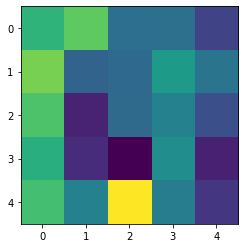

In [87]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

## LeNet implimentation (1998)
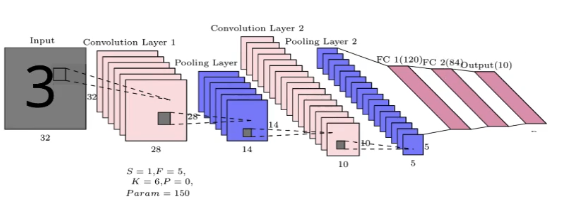
* One of the Deep learning based architecture for image classification task


In [134]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv_layer=nn.Sequential(nn.Conv2d(3,6,5), #(N,3,32,32) -> (N,6,28,28)
                                 nn.Tanh(),
                                 nn.AvgPool2d(2,stride=2), # (N,6,28,28) -> (N,6,14,14)
                                 nn.Conv2d(6,16,5), #(N,6,14,14) -> (N,16,10,10)
                                 nn.Tanh(),
                                 nn.AvgPool2d(2,stride=2) #(N,16,10,10) -> (N,16,5,5)
                                                                                                   
        )
        self.fc_layer=nn.Sequential(nn.Linear(400,120), # (N,400 (16*5*5))->(N,120)
                                    nn.Tanh(),
                                    nn.Linear(120,84), #(N,120)-> (N, 84)
                                    nn.Tanh(),
                                    nn.Linear(84,10) #(N,84) -> (N,10)
                                    
        )
        
    def forward(self,x):
        #print(x.shape)
        x=self.conv_layer(x)
        #print(x.shape)
        x=x.view(x.size(0),-1)
        #print(x.shape)
        x=self.fc_layer(x)
        #print(x.shape)
        return x
        
        

In [135]:
LeNet_net=LeNet()

In [136]:
out=LeNet_net(images)

In [137]:
print(out)

tensor([[-0.0782,  0.0540, -0.0345, -0.0566, -0.1331, -0.0938,  0.0547, -0.0199,
         -0.0173,  0.1363],
        [-0.0366,  0.0382, -0.0306, -0.0882, -0.1411, -0.1001,  0.0309, -0.0139,
         -0.0284,  0.1585],
        [-0.0583,  0.0443, -0.0263, -0.0579, -0.1422, -0.0730,  0.0402, -0.0287,
         -0.0284,  0.1695],
        [-0.0679,  0.0299, -0.0185, -0.0747, -0.1361, -0.0885,  0.0356, -0.0123,
         -0.0387,  0.1594],
        [-0.0518,  0.0332, -0.0295, -0.0644, -0.1412, -0.0869,  0.0396, -0.0284,
         -0.0329,  0.1683],
        [-0.0571,  0.0384, -0.0221, -0.0719, -0.1428, -0.0893,  0.0465, -0.0195,
         -0.0231,  0.1555],
        [-0.0669,  0.0134, -0.0126, -0.0740, -0.1362, -0.0759,  0.0164, -0.0254,
         -0.0493,  0.2000],
        [-0.0795,  0.0392, -0.0316, -0.0597, -0.1402, -0.0844,  0.0295, -0.0202,
         -0.0300,  0.1630],
        [-0.0614,  0.0438, -0.0133, -0.0673, -0.1185, -0.0857,  0.0449, -0.0152,
         -0.0443,  0.1586],
        [-0.0649,  

In [94]:
max_values, pred_class=torch.max(out.data,1)

In [95]:
print(pred_class)

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])


In [126]:
pred_class.size(0)

10

In [115]:
max_values

tensor([0.1256, 0.1087, 0.1106, 0.1320, 0.1090, 0.1187, 0.1179, 0.1254, 0.1277,
        0.1244])

In [96]:
batch_size=128
trainset=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset=torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [106]:
classes=trainloader.dataset.classes

In [112]:
trainloader.dataset.data.shape

(50000, 32, 32, 3)

In [113]:
testloader.dataset.data.shape

(10000, 32, 32, 3)

In [156]:
count=0
for data in trainloader:
    count+=1
print(count)    

391


In [161]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [162]:
print(device)

cpu


In [163]:
def evaluation(dataloader):
    total,correct=0,0
    for data in dataloader:
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        outputs=LeNet_net(inputs)
        _,pred=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(pred==labels).sum().item()
        return 100*correct/total

In [129]:
import torch.optim as optim

In [130]:
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(LeNet_net.parameters())

In [164]:
LeNet=LeNet().to(device)

Epoch:0/16
Epoch:1/16
Epoch:2/16
Epoch:3/16
Epoch:4/16
Epoch:5/16
Epoch:6/16
Epoch:7/16
Epoch:8/16
Epoch:9/16
Epoch:10/16
Epoch:11/16
Epoch:12/16
Epoch:13/16
Epoch:14/16
Epoch:15/16


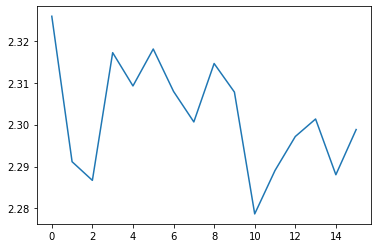

Wall time: 6min 35s


In [159]:
%%time
loss_arr=[]
loss_epoch_err=[]
max_epoch=16

for epoch in range(max_epoch):
    for i, data in enumerate(trainloader,0):
        inputs,labels=data\
        inputs,labels=inputs.to(device),labels.to(device)
        
        opt.zero_grad()
        
        outputs=LeNet_net(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
    loss_epoch_err.append(loss.item())
    print("Epoch:%d/%d" %(epoch,max_epoch))
plt.plot(loss_epoch_err)
plt.show()

In [160]:
print("Test Accuracy: %0.2f,Train Accuracy: %0.2f" %(evaluation(testloader),evaluation(trainloader)))

Test Accuracy: 4.69,Train Accuracy: 8.59


## Basic Visualization

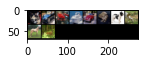

In [167]:
imshow(torchvision.utils.make_grid(images))

In [168]:
LeNet_net=LeNet.to("cpu")

In [169]:
out=LeNet_net(images)

In [170]:
print(out.shape)

torch.Size([10, 10])


In [171]:
out=LeNet_net.conv_layer[0](images)

In [172]:
print(out.shape)

torch.Size([10, 6, 28, 28])


In [183]:
out=LeNet_net.conv_layer[0](images)

In [184]:
out.shape

torch.Size([10, 6, 28, 28])

In [196]:
out2=LeNet_net.conv_layer[0](images)

In [197]:
out2.shape

torch.Size([10, 6, 28, 28])

In [189]:
image_id=4

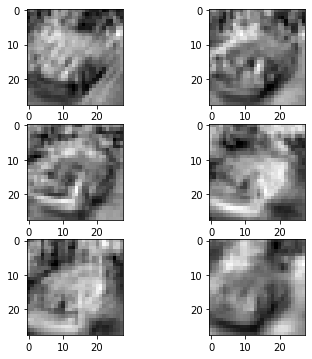

In [190]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
    ax1=plt.subplot(3,2,i+1)
    plt.imshow(out[image_id,i,:,:].detach().numpy(),cmap="binary")
plt.show()